Computing SHAP values...


100%|===================| 150788/151112 [05:37<00:00]        

Generating summary plot...


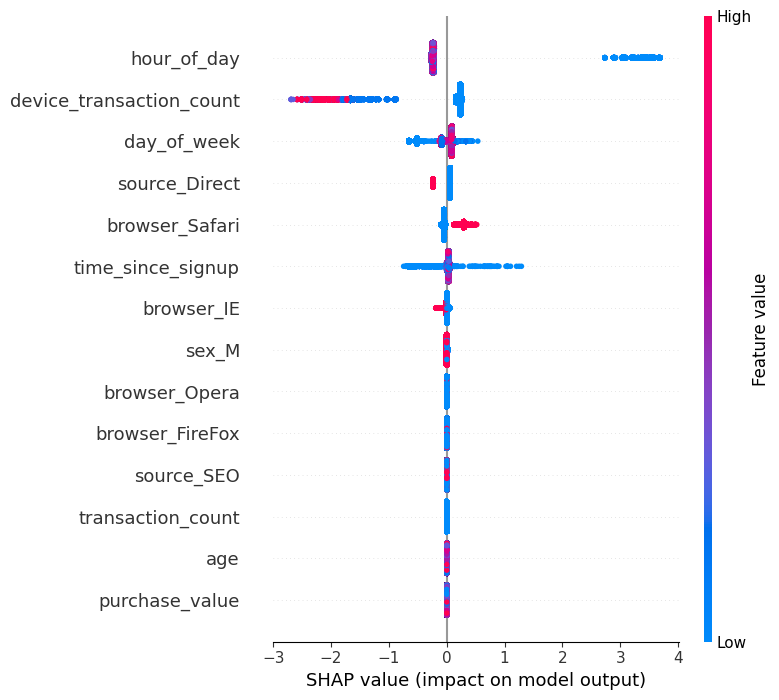

Generating force plot for index 0...


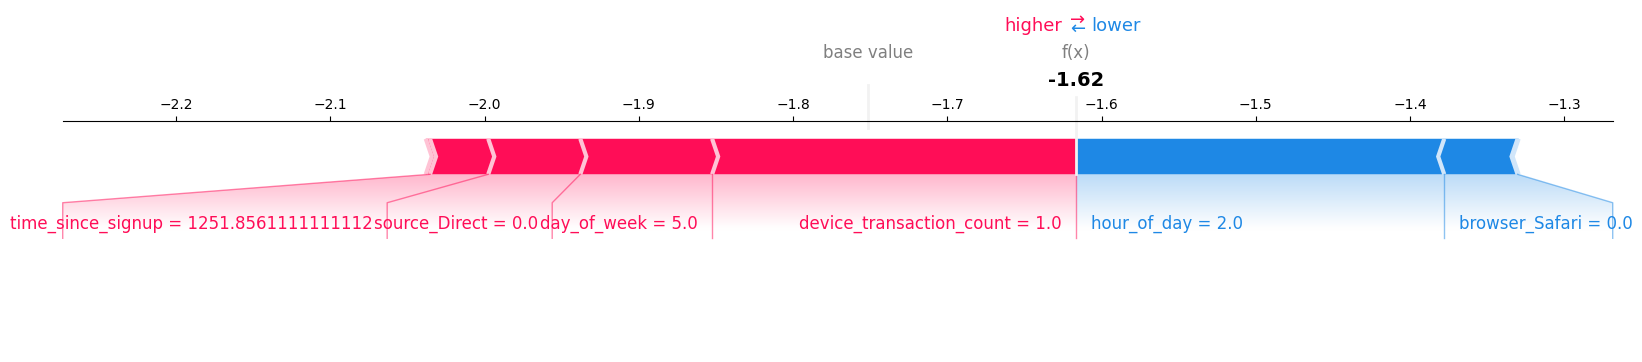

In [6]:
import pandas as pd
import joblib
import os
import sys
import importlib
sys.path.append(os.path.abspath(".."))
import src.shap_explainer
importlib.reload(src.shap_explainer)
from src.shap_explainer import SHAPExplainer

# Load your best-performing model (replace with correct path)
model = joblib.load('../models/xgboost_fraud_model.pkl')

# Load the training data (same used to train the model)
fraud_df = pd.read_csv('../data/processed_fraud_data.csv')  # should match your task 2 processed data

X = fraud_df.drop(columns=['class', 'signup_time', 'purchase_time', 'ip_address', 'ip_int', 'user_id', 'device_id', 'country'])
X = pd.get_dummies(X, drop_first=True)
# Convert all bool columns to int (0/1)
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})


# SHAP Explanation
explainer = SHAPExplainer(model, X)
explainer.compute_shap_values()
explainer.plot_summary()
explainer.plot_force(index=0)
